# <div align="center"><ins>Project on Predictive Data Modeling with Portugal 2019 Election Data</ins></div>

<div align="center"><img src="election-img.jpg" width = 100%/></div>

***
**NORKA B5, Group 3**<br>
**Team Members:** *Sruthy Surendran, Heleena Joy, Jebitta Joseph, Gopikrishna Shyam Kumar, Sreehari P S*
***

### <div align="center"> About the Dataset </div>
***

Dataset used in this project describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 21 parties involved in the electoral event. Overall, the dataset contains 21643 records over 28 features (including the target variable). This dataset is a combination of data concerning the overall election and the party voting information which are joined w.r.t the timestamp of data acquisition and the respective district.<br><br>
**Election data columns** = *{'TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters'}*<br>
**Party data columns** = *{'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes'}*
<br>**Column Description:**

|Sno|Column|Type|Description|
|:-|:-|:-|:-|
|1|TimeElapsed |numeric|Time (minutes) passed since the first data acquisition|
|2|time|timestamp|Date and time of the data acquisition|
|3|territoryName|string|Short name of the location (district or nation-wide)|
|4|totalMandates|numeric|MP's elected at the moment|
|5|availableMandates|numeric|MP's left to elect at the moment|
|6|numParishes|numeric|Total number of parishes in this location|
|7|numParishesApproved|numeric|Number of parishes approved in this location|
|8|blankVotes|numeric|Number of blank votes (NOTA)|
|9|blankVotesPercentage|numeric|Percentage of blank votes|
|10|nullVotes|numeric|Number of null votes (Incorrect Info)|
|11|nullVotesPercentage|numeric|Percentage of null votes|
|12|votersPercentage|numeric|Percentage of voters|
|13|subscribedVoters|numeric| Number of subscribed voters in the location|
|14|totalVoters|numeric|Number of votes cast|
|15|pre.blankVotes|numeric|Number of blank votes (previous election)|
|16|pre.blankVotesPercentage|numeric|Percentage of blank votes (previous election)|
|17|pre.nullVotes|numeric|Number of null votes (previous election)|
|18|pre.nullVotesPercentage|numeric|Percentage of null votes (previous election)|
|19|pre.votersPercentage|numeric|Percentage of voters (previous election)|
|20|pre.subscribedVoters|numeric|Number of subscribed voters in the location (previous election)|
|21|pre.totalVoters|numeric|Number of votes cast (previous election)|
|22|Party|string|Political Party|
|23|Mandates|numeric|MP's elected at the moment for the party in a given district|
|24|Percentage|numeric|Percentage of votes in a party|
|25|validVotesPercentage|numeric|Percentage of valid votes in a party|
|26|Votes|numeric|Party votes|
|27|Hondt|numeric|Number of MP's according to the distribution of votes now|
|28|FinalMandates|numeric (Target)|Final number of elected MP's in a territory for a Party|

*Courtesy:*
1. https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019
2. https://www.analyticsvidhya.com/

### About Portugal
>1. Portugal has 20 districts, out of which 2 are autonomous.
2. There are 21 parties which participates in election across districts of portugal.
3. "Território Nacional" refers to portugal as a nation, not a serparate district as others. "Madeira and Açores" are Autonomous regions in Portugal

### Problem Statement
>To apply regression modelling to predict total number of MPs elected from a party under a given region.

***
### <div align="center"> Python Environment Setup </div>
***

In [13]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

***
### <div align="center"> Basic Analysis </div>
***

In [14]:
# Load the dataset to pandas dataframe
ucdata = pd.read_csv("Portugal_Election_Data.csv")

In [15]:
print(f"Shape of uncleaned election dataset is {ucdata.shape}")

Shape of uncleaned election dataset is (21643, 28)


In [16]:
print(f"Columns in uncleaned election dataset are::\n {ucdata.columns.values}")

Columns in uncleaned election dataset are::
 ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt' 'FinalMandates']


In [17]:
# Load the cleaned dataset after pre-processing to pandas dataframe
data = pd.read_csv('Processed_Portugal_Election_Data.csv')

In [18]:
print(f"Shape of cleaned election dataset is {data.shape}")

Shape of cleaned election dataset is (21643, 17)


In [19]:
data.head()

,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,votersPercentage,pre.votersPercentage,Party,Mandates,validVotesPercentage,Votes,Hondt,diff_subscribedVoters,diff_totalVoters,diff_blankVotes,diff_nullVotes,FinalMandates
0,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,1.126269,-0.127891,3.217832,1.419284,14.757327,0.03196,0.021592,0.002177,0.026495,15.259962
1,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,0.799979,-0.127891,2.733495,1.211248,12.691673,0.03196,0.021592,0.002177,0.026495,11.040237
2,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,-1.484053,-0.127891,0.178549,0.112293,2.363404,0.03196,0.021592,0.002177,0.026495,2.600786
3,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,-1.320908,-0.127891,-0.006179,0.032984,1.727818,0.03196,0.021592,0.002177,0.026495,0.563677
4,0.982968,-0.36868,6.758472,4.221354,1.405486,-0.128489,-0.380551,0.147398,-0.127891,-0.034669,0.020460,1.568922,0.03196,0.021592,0.002177,0.026495,1.582231


***
### <div align="center"> Regression Modelling </div>
***

### Preparing Dataset


In [20]:
# dropping Final Mandate variable from X 
#assign the value of y for training
x = data.drop(columns=['FinalMandates'])
y = data[["FinalMandates"]]

In [21]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

#defining a function to find model score,r2 score for the given dataset
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),RandomForestRegressor(),AdaBoostRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n')       


Score of LinearRegression() is: 0.9935457511688592
MAE: 0.026906024539458374
MSE: 0.007422977642501335
RMSE: 0.08615670399046922
R2 score: 0.9914183746768956
****************************************************************************************************


Score of SVR() is: 0.9764393247937873
MAE: 0.05167359271979414
MSE: 0.023365584891633394
RMSE: 0.15285805471624123
R2 score: 0.9729872963853332
****************************************************************************************************


Score of DecisionTreeRegressor() is: 1.0
MAE: 0.0001680616457922278
MSE: 2.4454275790290053e-05
RMSE: 0.004945126468583999
R2 score: 0.9999717286724429
****************************************************************************************************


Score of KNeighborsRegressor() is: 0.9999056891791871
MAE: 0.0004907400056795506
MSE: 6.358111705476416e-05
RMSE: 0.007973776837532146
R2 score: 0.9999264945483516
*************************************************************************


#### **Observation:**
>a. Random Forest Regressor and Decision Tree Regressor Model are performing the best regression.

>b. Both models have extremely low error and high R2 score.

>c. Now we will tune both to choose the best results.


***
### <div align="center"> Hyperparameter Tuning </div>
***

In [23]:
#We will check for RFC and DTC individually
#Estimating parameters of DecisionTree Classifiers for best fit
dtr_rg = DecisionTreeRegressor()
parameters={'criterion':['mse'],'max_depth': np.arange(3, 15)}
clf = GridSearchCV(dtr_rg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'criterion': 'mse', 'max_depth': 7}

In [24]:
#Using Decision Tree Regressor with its best parameter
from sklearn.ensemble import RandomForestRegressor
dtr_rg = DecisionTreeRegressor(criterion="mse",max_depth=6)
dtr_rg.fit(x_train,y_train)
print('Score:',dtr_rg.score(x_train,y_train))
y_pred_dtr=dtr_rg.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred_dtr))
print('Mean squared error:',mean_squared_error(y_test,y_pred_dtr))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_dtr)))
print('R2 score:',r2_score(y_test,y_pred_dtr))

Score: 0.9994769923635698
Mean absolute error: 0.004585774087889097
Mean squared error: 0.00048123532831178016
Root Mean Squared Error: 0.021937076567122158
R2 score: 0.9994436489669365


In [25]:
#Using GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV

parameters={'n_estimators':[200,400] ,'max_depth':[4,5,10,15,20]}
rfr=RandomForestRegressor()

clf=GridSearchCV(rfr,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 400}


In [26]:
#Using Random Forest Regressor with its best parameter
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,max_features='auto',max_depth=5)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred_rf=rf.predict(x_test)
print('Mean absolute error:',mean_absolute_error(y_test,y_pred_rf))
print('Mean squared error:',mean_squared_error(y_test,y_pred_rf))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('R2 score:',r2_score(y_test,y_pred_rf))

Score: 0.9990871058597369
Mean absolute error: 0.008068209975960977
Mean squared error: 0.0009179085472021891
Root Mean Squared Error: 0.030297005581446313
R2 score: 0.9989388157135403


#### **Observations:**
>a. Since RMSE value of Random forest regressor is smaller than Decision Tree , we will use it as our final model.

>b. Final score for RFR model is 0.9999 , RMSE is 0.03 and R2 score is 0.9989

Text(0, 0.5, 'Predicted Y')

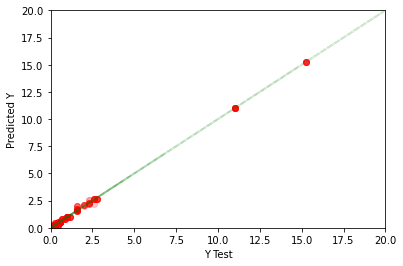

In [27]:
#Plotting our prediction vs test results with RFR model 
plt.scatter(x=y_test,y=y_pred_rf,marker= "o",color="red",alpha=0.2)
plt.plot(x,x,"g--",alpha=0.1)
plt.xlim(0,20)
plt.ylim(0,20)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### **Observations:**
>a. We have few outliers , but most points are lying on the straight line, which shows close match of true and predicted values.

>b. Our model seems to be an accurate predictor.

#### **Conclusion:**
>a. Checked various regressor models and found RandomForest and DecisionTree with best r2score values>0.99.

>b. Performed hypertuning to find best parameters of these models and finally chose RF for final model.

>c. Final score for RFR model is 0.9998 , RMSE is 0.03 and R2 score is 0.9996.

>d. Plotted scatter plot and found linear line that shows close match between test and predicted values.

>e. Also RMSE is found to be 0.03 which is close to zero, showing that model fitting is good.